In [22]:
import numpy as np
import matplotlib.pyplot as plt

# CIRCLE EQUATION: x² + y² = r² → y = ±√(r² - x²)
# Here r=10, so y = √(100 - x²) gives UPPER SEMICIRCLE only
x = np.linspace(-5.0, 5.0, 100)  # x from -5 to 5 (within circle radius)
y = np.sqrt(10**2 - x**2)        # Positive y: upper half only

# np.hstack([a,b]): HORIZONTAL CONCATENATE arrays → [a1,a2,...,an,b1,b2,...,bm]
y = np.hstack([y, -y])      # [upper_y, lower_y] → full circle y-values
x = np.hstack([x, -x])      # [-5→5, 5→-5] → full circle x-values (reversed for lower)

# Result: 200 points tracing COMPLETE CIRCLE (x² + y² = 100)


In [23]:
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])
#make the inner circle 

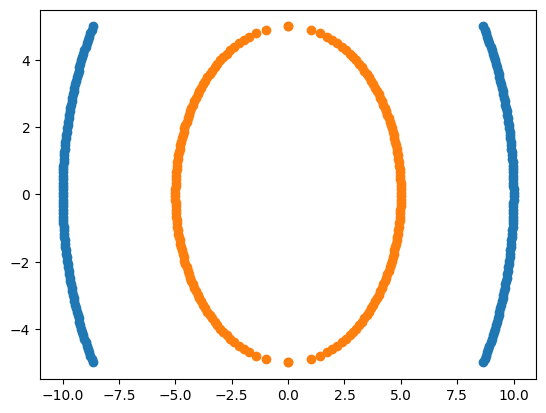

In [24]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [25]:
# np.vstack([y,x]): VERTICAL stack → stacks as ROWS
# [[y1], [y2], ...]     200x1
# [[x1], [x2], ...]    +
# ------------→ [[y1,x1], [y2,x2], ...]  200x2 matrix
# .T (transpose): Converts rows→columns → (200,2) shape for sklearn
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2])
df.head(5)

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [45]:
X=df[['X1','X2']]
y=df.Y

## becasue we added extra polynomial features acc =1

In [46]:
## Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

In [48]:
# Polynomial kernel degree=2 expands: x1, x2 → [x1, x2, x1², x2², x1*x2]
df['X1_Square'] = df['X1']**2     # Quadratic term for feature 1
df['X2_Square'] = df['X2']**2     # Quadratic term for feature 2  
df['X1*X2'] = df['X1'] * df['X2'] # Cross/interaction term (key for curves)

df.head()  # Now has 5 features instead of 2 → linearly separable in new space
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


In [42]:
import plotly.express as px
# Visualize polynomial transformation in 3D - shows why it works!


fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()




## HERE  WE CREATED EXTRA VARIABLES .... POLY DOES IT INTERNALLY 

In [31]:
# In 2D: Your classes form a circle - no straight line can separate inside/outside points.

# The trick: Create NEW features: X1², X2², X1*X2

# In 3D (X1², X2², X1*X2): The circle becomes a straight plane!

# Visual proof:

# 2D plot: Classes mixed in circle shape 

# 3D plot: Classes perfectly separated by flat plane 
# Kernel magic: Does this 2D→3D transformation without actually creating the new columns - just math trick.

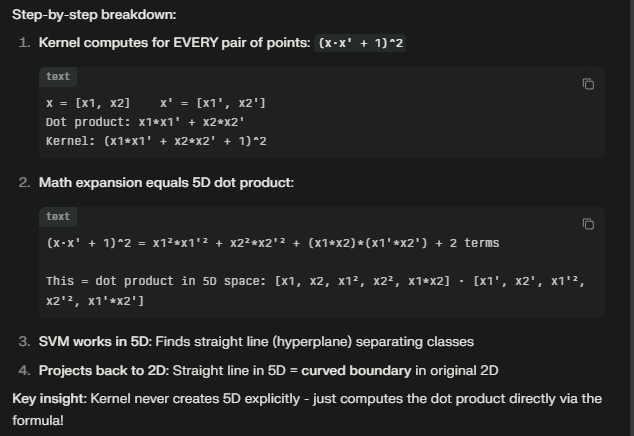

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)
## becasue we added extra polynomial features acc =1

1.0